In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [45]:
#Building a linear regression model from a trainning data
#start by reading the train data into a data frame using pandas
kaggletrain = pd.read_csv('/home/amidu/Downloads/kaggle competition/train.csv')


In [46]:
#reading the test data
kaggletest = pd.read_csv('/home/amidu/Downloads/kaggle competition/test.csv')

In [47]:
kaggletrain

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,124405
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,33649
5,Spain,This brut nature is citric and bubbly on the p...,Brut Nature Reserva,83.118679,13.0,Catalonia,Cava,NaN,Michael Schachner,@wineschach,Mas Fi NV Brut Nature Reserva Sparkling (Cava),SPARKLING BLEND,Mas Fi,20153
6,France,"A ripe wine that has red-berry fruits, slices ...",Cuvée Prestige,88.320513,35.0,Bordeaux,Bordeaux Supérieur,NaN,Roger Voss,@vossroger,Château Tayet 2014 Cuvée Prestige (Bordeaux S...,BORDEAUX-STYLE RED BLEND,Château Tayet,72654
7,Italy,From one of Sicily's most beautiful and promis...,Baccante,85.173533,42.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,NaN,WHITE BLEND,Abbazia Santa Anastasia,117626
8,US,This wine plays close to the edge of overripe-...,NaN,85.908686,38.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Matrix 2013 Pinot Noir (Russian River Valley),PINOT NOIR,Matrix,112993
9,Italy,This basic Prosecco is perfectly quaffable tha...,Lellè Extra Dry,81.929514,14.0,Veneto,Prosecco,NaN,NaN,NaN,NaN,GLERA,Fattoria Giuseppe Savini,32542


In [48]:
kaggletest

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,41855,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin,0
1,10328,France,Charming raspberry aromas intertwine with scen...,Heluicum,90.966405,NaN,Rhône Valley,Collines Rhôdaniennes,NaN,NaN,NaN,NaN,SYRAH,Les Vins de Vienne,1
2,60094,US,"Ripe blackberry, leather and soy show on the n...",Estate,88.964358,NaN,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Brave & Maiden 2013 Estate Cabernet Franc (San...,CABERNET FRANC,Brave & Maiden,2
3,48333,US,White flowers and wild anise give this a crisp...,NaN,89.960356,NaN,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Les Voleurs 2013 Chardonnay (Sonoma Coast),CHARDONNAY,Les Voleurs,3
4,14498,US,Pinot Gris has been making inroads in Washingt...,NaN,88.075501,NaN,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Chateau Ste. Michelle 2015 Pinot Gris (Columbi...,PINOT GRIS,Chateau Ste. Michelle,4
5,91222,US,"An easy, gentle red wine, full-bodied and spic...",NaN,86.118662,NaN,California,Russian River Valley,Sonoma,NaN,NaN,Bearboat 2008 Syrah (Russian River Valley),SYRAH,Bearboat,5
6,126792,Argentina,Red berry fruit with touches of vanilla and sp...,Saurus Patagonia,86.054011,NaN,Other,Neuquén,NaN,NaN,NaN,NaN,PINOT NOIR,Familia Schroeder,6
7,50588,US,"Tart, dry and simple, this Cab will happily wa...",NaN,82.964697,NaN,California,California,California Other,NaN,NaN,Montevina 2006 Cabernet Sauvignon (California),CABERNET SAUVIGNON,Montevina,7
8,145901,Italy,"A gorgeous and opulent nose with honey, vanill...",NaN,88.950953,NaN,Northeastern Italy,Trentino,NaN,NaN,NaN,NaN,PINOT GRIGIO,Bollini,8
9,124649,Italy,"Pressed violet, baked plum, baking spice and c...",NaN,90.167277,NaN,Veneto,Amarone della Valpolicella Classico,NaN,Kerin O’Keefe,@kerinokeefe,David Sterza 2011 Amarone della Valpolicella ...,RED BLEND,David Sterza,9


In [65]:
#finding information on kaggle train data
kaggletrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 14 columns):
country                  174953 non-null object
description              175000 non-null object
designation              122734 non-null object
points                   175000 non-null float64
price                    175000 non-null float64
province                 174953 non-null object
region_1                 146466 non-null object
region_2                 75394 non-null object
taster_name              65509 non-null object
taster_twitter_handle    62190 non-null object
title                    82189 non-null object
variety                  174999 non-null object
winery                   175000 non-null object
id                       175000 non-null int64
dtypes: float64(2), int64(1), object(11)
memory usage: 18.7+ MB


In [66]:
#finding information on kaggle test data set
kaggletest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83210 entries, 0 to 83209
Data columns (total 15 columns):
index                    83210 non-null int64
country                  83193 non-null object
description              83210 non-null object
designation              58386 non-null object
points                   83210 non-null float64
price                    0 non-null float64
province                 83193 non-null object
region_1                 69327 non-null object
region_2                 35602 non-null object
taster_name              30970 non-null object
taster_twitter_handle    29369 non-null object
title                    38786 non-null object
variety                  83210 non-null object
winery                   83210 non-null object
id                       83210 non-null int64
dtypes: float64(2), int64(2), object(11)
memory usage: 9.5+ MB


In [49]:
#outputing the first 5 default indexes of the dataframe
kaggletrain.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,124405
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,33649


In [51]:
kaggletest.head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,41855,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin,0
1,10328,France,Charming raspberry aromas intertwine with scen...,Heluicum,90.966405,NaN,Rhône Valley,Collines Rhôdaniennes,NaN,NaN,NaN,NaN,SYRAH,Les Vins de Vienne,1
2,60094,US,"Ripe blackberry, leather and soy show on the n...",Estate,88.964358,NaN,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Brave & Maiden 2013 Estate Cabernet Franc (San...,CABERNET FRANC,Brave & Maiden,2
3,48333,US,White flowers and wild anise give this a crisp...,NaN,89.960356,NaN,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Les Voleurs 2013 Chardonnay (Sonoma Coast),CHARDONNAY,Les Voleurs,3
4,14498,US,Pinot Gris has been making inroads in Washingt...,NaN,88.075501,NaN,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Chateau Ste. Michelle 2015 Pinot Gris (Columbi...,PINOT GRIS,Chateau Ste. Michelle,4


In [52]:
#finding the last 5 rows of the train data
kaggletrain.tail()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
174995,US,"Named for the clone so beloved by winemakers, ...",Old Wente,93.965358,55.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Lynmar 2014 Old Wente Chardonnay (Russian Rive...,CHARDONNAY,Lynmar,51364
174996,Portugal,"This is a fresh, fruity and juicy wine. Shot t...",Bojador Branco,85.975164,14.0,Alentejano,NaN,NaN,Roger Voss,@vossroger,Espaço Rural 2014 Bojador Branco White (Alente...,PORTUGUESE WHITE,Espaço Rural,87223
174997,Spain,"Clean and toasty, with mineral and the slighte...",Cordon Negro Brut,85.030109,10.0,Catalonia,Cava,NaN,NaN,NaN,NaN,SPARKLING BLEND,Freixenet,142217
174998,US,"A lovely Pinot Noir, showing flamboyantly ripe...",Estate Grown,90.867770,65.0,California,Russian River Valley,Sonoma,NaN,NaN,NaN,PINOT NOIR,Donum,64741
174999,US,"Made to benefit the exploratory organization, ...",National Geographic Ocean Reserve Blanc de Blancs,91.881217,50.0,California,Green Valley,Sonoma,Virginie Boone,@vboone,Iron Horse 2013 National Geographic Ocean Rese...,SPARKLING BLEND,Iron Horse,91621


In [53]:
#finding the last five rows of the test data
kaggletest.tail()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
83205,48152,US,"A simple, direct wine, pretty full-bodied for ...",Le Pique-Nique,81.961663,NaN,California,Sonoma Valley,Sonoma,NaN,NaN,NaN,ROSé,Wellington,83205
83206,103366,US,"This dry, spicy wine shows the rustic, rugged ...",Rebecca's Vineyard,87.162191,NaN,California,Dry Creek Valley,Sonoma,NaN,NaN,NaN,CABERNET SAUVIGNON,Forth,83206
83207,145186,Italy,"Attractive apricot, peach and honey aromas vie...",Aurente,89.057585,NaN,Central Italy,Umbria,NaN,NaN,NaN,NaN,CHARDONNAY,Lungarotti,83207
83208,52682,France,Red cherries and jelly fruits highlight a wine...,NaN,84.907909,NaN,Burgundy,Bourgogne,NaN,NaN,NaN,NaN,PINOT NOIR,Bouchard Père & Fils,83208
83209,107107,Italy,Tasca d'Almerita makes what may be the best ex...,NaN,92.038702,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,NaN,CABERNET SAUVIGNON,Tasca d'Almerita,83209


In [54]:
#finding the dimension of the train data frame
kaggletrain.shape

(175000, 14)

In [55]:
#finding the dimension of the test data frame
kaggletest.shape

(83210, 15)

In [56]:
#finding the number of train data columns
len(kaggle.columns)

14

In [58]:
#finding the number of test data columns
len(kaggletest.columns)

15

In [59]:
#finding the number of rows of train data set
len(kaggletrain)

175000

In [60]:
#finding the number of rows of the test data set
len(kaggletest)

83210

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin,0
1,France,Charming raspberry aromas intertwine with scen...,Heluicum,90.966405,NaN,Rhône Valley,Collines Rhôdaniennes,NaN,NaN,NaN,NaN,SYRAH,Les Vins de Vienne,1
2,US,"Ripe blackberry, leather and soy show on the n...",Estate,88.964358,NaN,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Brave & Maiden 2013 Estate Cabernet Franc (San...,CABERNET FRANC,Brave & Maiden,2
3,US,White flowers and wild anise give this a crisp...,NaN,89.960356,NaN,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Les Voleurs 2013 Chardonnay (Sonoma Coast),CHARDONNAY,Les Voleurs,3
4,US,Pinot Gris has been making inroads in Washingt...,NaN,88.075501,NaN,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Chateau Ste. Michelle 2015 Pinot Gris (Columbi...,PINOT GRIS,Chateau Ste. Michelle,4
5,US,"An easy, gentle red wine, full-bodied and spic...",NaN,86.118662,NaN,California,Russian River Valley,Sonoma,NaN,NaN,Bearboat 2008 Syrah (Russian River Valley),SYRAH,Bearboat,5
6,Argentina,Red berry fruit with touches of vanilla and sp...,Saurus Patagonia,86.054011,NaN,Other,Neuquén,NaN,NaN,NaN,NaN,PINOT NOIR,Familia Schroeder,6
7,US,"Tart, dry and simple, this Cab will happily wa...",NaN,82.964697,NaN,California,California,California Other,NaN,NaN,Montevina 2006 Cabernet Sauvignon (California),CABERNET SAUVIGNON,Montevina,7
8,Italy,"A gorgeous and opulent nose with honey, vanill...",NaN,88.950953,NaN,Northeastern Italy,Trentino,NaN,NaN,NaN,NaN,PINOT GRIGIO,Bollini,8
9,Italy,"Pressed violet, baked plum, baking spice and c...",NaN,90.167277,NaN,Veneto,Amarone della Valpolicella Classico,NaN,Kerin O’Keefe,@kerinokeefe,David Sterza 2011 Amarone della Valpolicella ...,RED BLEND,David Sterza,9


In [61]:
#finding the total number of entries of the train data frame
kaggletrain.size

2450000

In [62]:
#finding the total number of entries of the test data set
kaggletest.size

1248150

In [64]:
#finding the column names of the train data frame
kaggletrain.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery', 'id'],
      dtype='object')

In [67]:
#finding the column names of the test data frame
kaggletest.columns

Index(['index', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery', 'id'],
      dtype='object')

In [68]:
#dropping a column index of the test data frame
kaggletest = kaggletest.drop('index', axis='columns')

In [70]:
#finding the number of columns after dropping the index column
len(kaggletest.columns)

14

In [74]:
#finding the row index of the train and test data frame
kaggletrain.index, kaggletest.index


(RangeIndex(start=0, stop=175000, step=1),
 RangeIndex(start=0, stop=83210, step=1))

In [75]:
#finding the output of the train data points
kaggletrain.values

array([['Portugal',
        "This is a fine rich balanced wine. It has ripe fruits that suggest black currants, blackberries and a tight, stalky, mineral element. At the same time, it's generous, full of juicy acidity to contrast with the dusty tannin layer that keeps it all together. Drink now.",
        'Vila Santa Reserva', ..., 'PORTUGUESE RED', 'J. Portugal Ramos',
        32027],
       ['France',
        'A solid, chunky wine, with a structure that is full of corners and edges. The tannins are in a dusty, chewy style, balancing with the fresh black fig and sweet plum juice flavors. Rich and concentrated, the wine needs to age.',
        nan, ..., 'BORDEAUX-STYLE RED BLEND',
        'Château Tour Grand Colombier', 71079],
       ['France',
        'This is powerful and concentrated, with the high proportion of Cabernet Sauvignon in the blend standing out firmly. It is dark, rich, packed with ripe black fruits and sweet tannins. Drink from 2018.',
        nan, ..., 'BORDEAUX-STYLE

In [76]:
#finding the output of the test data points
kaggletest.values

array([['US',
        "Sweet new oak stands out, giving this Cabernet caramel aromas and flavors. But the oak is perfectly in keeping with the wine's massive power. Underneath the wood char is a dry, tannic wine with rich blackberry and currant flavors. It's a bit disjointed now, needing time for everything to mesh together. Could be really something around 2015.",
        '3D', ..., 'CABERNET SAUVIGNON', 'Salvestrin', 0],
       ['France',
        'Charming raspberry aromas intertwine with scents of green herbs and smoke, then pick up hints of espresso. This medium-bodied Syrah ends with pretty berry shadings and a silky texture. Drink now and over the next several years.',
        'Heluicum', ..., 'SYRAH', 'Les Vins de Vienne', 1],
       ['US',
        'Ripe blackberry, leather and soy show on the nose of this solid bottling from a relatively new producer in the heart of the Santa Ynez Valley. Fruit-forward flavors of red and purple berries rise to the top of the palate, but there i

In [81]:
#finding the type of output of the index of the train and test data sets
type(kaggletrain.index),     type(kaggletest.index)

(pandas.core.indexes.range.RangeIndex, pandas.core.indexes.range.RangeIndex)

In [82]:
#finding the type of outputs of the columns of the train and test data
type(kaggletrain.columns), type(kaggletest.columns)

(pandas.core.indexes.base.Index, pandas.core.indexes.base.Index)

In [83]:
#finding the type of outputs of the train and dataset respectively
type(kaggletrain.values), type(kaggletest.values)

(numpy.ndarray, numpy.ndarray)

In [84]:
#finding the data types of the trsin data frame
kaggletrain.dtypes

country                   object
description               object
designation               object
points                   float64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
id                         int64
dtype: object

In [85]:
#finding the total number of different train data types
kaggletrain.get_dtype_counts() 

float64     2
int64       1
object     11
dtype: int64

In [86]:
#finding the total number of different test data types
kaggletest.get_dtype_counts()

object     11
float64     2
int64       1
dtype: int64

In [87]:
#DATA PREPROCESSING 

#checking whether there are missing values in the train data
kaggletrain.isnull()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,False,False,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,True,False,False,False,False,True,True,True,True,False,False,False
2,False,False,True,False,False,False,False,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,True,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,True,True,True,False,False,False
8,False,False,True,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,True,True,True,True,False,False,False


In [89]:
#finding the sum of the missing values of the train dataset
kaggletrain.isnull().sum()

country                      47
description                   0
designation               52266
points                        0
price                         0
province                     47
region_1                  28534
region_2                  99606
taster_name              109491
taster_twitter_handle    112810
title                     92811
variety                       1
winery                        0
id                            0
dtype: int64

In [153]:
#filling all missing values of the dataframe
kaggletrain_filled = kaggle.fillna(0)
kaggletrain_filled

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,0,0,0,0,0,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",0,88.041695,28.0,Bordeaux,Lalande de Pomerol,0,0,0,0,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,"This is powerful and concentrated, with the hi...",0,94.085021,130.0,Bordeaux,Saint-Émilion,0,0,0,0,BORDEAUX-STYLE RED BLEND,Château Figeac,32440
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,0,0,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,124405
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,33649
5,Spain,This brut nature is citric and bubbly on the p...,Brut Nature Reserva,83.118679,13.0,Catalonia,Cava,0,Michael Schachner,@wineschach,Mas Fi NV Brut Nature Reserva Sparkling (Cava),SPARKLING BLEND,Mas Fi,20153
6,France,"A ripe wine that has red-berry fruits, slices ...",Cuvée Prestige,88.320513,35.0,Bordeaux,Bordeaux Supérieur,0,Roger Voss,@vossroger,Château Tayet 2014 Cuvée Prestige (Bordeaux S...,BORDEAUX-STYLE RED BLEND,Château Tayet,72654
7,Italy,From one of Sicily's most beautiful and promis...,Baccante,85.173533,42.0,Sicily & Sardinia,Sicilia,0,0,0,0,WHITE BLEND,Abbazia Santa Anastasia,117626
8,US,This wine plays close to the edge of overripe-...,0,85.908686,38.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Matrix 2013 Pinot Noir (Russian River Valley),PINOT NOIR,Matrix,112993
9,Italy,This basic Prosecco is perfectly quaffable tha...,Lellè Extra Dry,81.929514,14.0,Veneto,Prosecco,0,0,0,0,GLERA,Fattoria Giuseppe Savini,32542


In [90]:
#examining whether there are missing values in the test data set
kaggletest.isnull()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,False,False,False,False,True,False,False,False,True,True,False,False,False,False
1,False,False,False,False,True,False,False,True,True,True,True,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,True,False,True,False,False,False,False,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,False,False,False,False
5,False,False,True,False,True,False,False,False,True,True,False,False,False,False
6,False,False,False,False,True,False,False,True,True,True,True,False,False,False
7,False,False,True,False,True,False,False,False,True,True,False,False,False,False
8,False,False,True,False,True,False,False,True,True,True,True,False,False,False
9,False,False,True,False,True,False,False,True,False,False,False,False,False,False


In [91]:
#finding the total number of missing values in the test data set
kaggletest.isnull().sum()

country                     17
description                  0
designation              24824
points                       0
price                    83210
province                    17
region_1                 13883
region_2                 47608
taster_name              52240
taster_twitter_handle    53841
title                    44424
variety                      0
winery                       0
id                           0
dtype: int64

In [161]:
#filling the missing values of the test data set
kaggletest_filled = kaggletest.fillna(0)
kaggletest_filled

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,0.0,California,St. Helena,Napa,0,0,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin,0
1,France,Charming raspberry aromas intertwine with scen...,Heluicum,90.966405,0.0,Rhône Valley,Collines Rhôdaniennes,0,0,0,0,SYRAH,Les Vins de Vienne,1
2,US,"Ripe blackberry, leather and soy show on the n...",Estate,88.964358,0.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Brave & Maiden 2013 Estate Cabernet Franc (San...,CABERNET FRANC,Brave & Maiden,2
3,US,White flowers and wild anise give this a crisp...,0,89.960356,0.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Les Voleurs 2013 Chardonnay (Sonoma Coast),CHARDONNAY,Les Voleurs,3
4,US,Pinot Gris has been making inroads in Washingt...,0,88.075501,0.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Chateau Ste. Michelle 2015 Pinot Gris (Columbi...,PINOT GRIS,Chateau Ste. Michelle,4
5,US,"An easy, gentle red wine, full-bodied and spic...",0,86.118662,0.0,California,Russian River Valley,Sonoma,0,0,Bearboat 2008 Syrah (Russian River Valley),SYRAH,Bearboat,5
6,Argentina,Red berry fruit with touches of vanilla and sp...,Saurus Patagonia,86.054011,0.0,Other,Neuquén,0,0,0,0,PINOT NOIR,Familia Schroeder,6
7,US,"Tart, dry and simple, this Cab will happily wa...",0,82.964697,0.0,California,California,California Other,0,0,Montevina 2006 Cabernet Sauvignon (California),CABERNET SAUVIGNON,Montevina,7
8,Italy,"A gorgeous and opulent nose with honey, vanill...",0,88.950953,0.0,Northeastern Italy,Trentino,0,0,0,0,PINOT GRIGIO,Bollini,8
9,Italy,"Pressed violet, baked plum, baking spice and c...",0,90.167277,0.0,Veneto,Amarone della Valpolicella Classico,0,Kerin O’Keefe,@kerinokeefe,David Sterza 2011 Amarone della Valpolicella ...,RED BLEND,David Sterza,9


In [152]:
#counting the elements after filling 
kaggletestfilled.count()

country                  83210
description              83210
designation              83210
points                   83210
price                    83210
province                 83210
region_1                 83210
region_2                 83210
taster_name              83210
taster_twitter_handle    83210
title                    83210
variety                  83210
winery                   83210
id                       83210
dtype: int64

In [102]:
#dropping all missing values of the train data set
kaggletrain.dropna()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,33649
14,US,Vigorous bubbles present a Pinot Noir-like nos...,Sierra Madre Vineyard Crémant,92.885140,38.0,California,Santa Maria Valley,Central Coast,Matt Kettmann,@mattkettmann,Goat Bubbles 2011 Sierra Madre Vineyard Créman...,SPARKLING BLEND,Goat Bubbles,100620
19,US,The delicate nose on this reserve Chard offers...,Estate Bottled Reserve,85.944287,20.0,New York,Finger Lakes,Finger Lakes,Susan Kostrzewa,@suskostrzewa,Lamoreaux Landing 2007 Estate Bottled Reserve ...,CHARDONNAY,Lamoreaux Landing,23448
48,US,"This wine bears the blue label, and includes 2...",Blue Label,85.978471,24.0,Oregon,Applegate Valley,Southern Oregon,Paul Gregutt,@paulgwine,Troon 2014 Blue Label Vermentino (Applegate Va...,VERMENTINO,Troon,56311
53,US,"Merlot is the principal grape here, with Caber...",Cuvée Estelle,92.752930,50.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Lauren Ashton Cellars 2011 Cuvée Estelle Red (...,BORDEAUX-STYLE RED BLEND,Lauren Ashton Cellars,78227
62,US,"Sharp and tannic, this wine hides its thin fru...",Grand Reserve,80.996748,30.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Silver Lake 2003 Grand Reserve Cabernet Sauvig...,CABERNET SAUVIGNON,Silver Lake,15602
71,US,Cola and soft red raspberry scents show on the...,Cuvée Constantine,87.836532,47.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Demetria 2014 Cuvée Constantine Red (Santa Yne...,RHôNE-STYLE RED BLEND,Demetria,37388
72,US,"Black plum, boysenberry and fig flavors fill t...",Three Stags,84.864298,15.0,California,California,California Other,Jim Gordon,@gordone_cellars,Scott Harvey 2012 Three Stags Red (California),RED BLEND,Scott Harvey,15978
81,US,This is a terrific representation of all that ...,Keefer Ranch,92.943672,52.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Cellars 33 2013 Keefer Ranch Pinot Noir (Russi...,PINOT NOIR,Cellars 33,29389
91,US,Luscious dark-cherry aromas find milk chocolat...,The Mineshaft,87.016089,45.0,California,Sierra Foothills,Sierra Foothills,Jim Gordon,@gordone_cellars,Tanner 2013 The Mineshaft Red (Sierra Foothills),RED BLEND,Tanner,55161


In [103]:
#dropping all missing values of the test data set
kaggletest.dropna()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id


In [104]:
#checking the size after dropping the missing values of train data
kaggletrain.dropna().size

213430

In [105]:
#checking the size after dropping the missing values of test data
kaggletest.dropna().size

0

In [155]:
#extracting columns for target and feature variables using the filter method
kaggletrain_filled.filter(items=['points','price']).head()

,points,price
0,88.870874,20.0
1,88.041695,28.0
2,94.085021,130.0
3,89.869797,34.0
4,89.017651,24.0


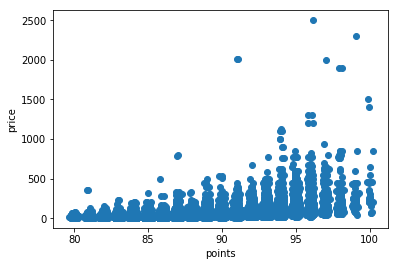

In [156]:
#performing data visualization on points and price of the train data set
plt.scatter(kaggletrain_filled.points,kaggletrain_filled.price)
plt.xlabel('points')
plt.ylabel('price')
plt.show()

In [157]:
#obtaining some statistics on the numeric data points
kaggletrain_filled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
points,175000.0,88.083987,3.157001,79.636128,85.971283,87.981631,90.085631,100.220603
price,175000.0,34.304400,38.398146,4.000000,16.000000,25.000000,40.000000,2500.000000
id,175000.0,70684.047240,41341.638798,1.000000,35020.000000,70256.500000,105550.250000,150929.000000


In [158]:
#splitting the data into trainning and test data points
xtrain = kaggletrain_filled[['points']]
xtrain.shape



(175000, 1)

In [159]:
ytrain = kaggletrain_filled[['price']]
ytrain.shape


(175000, 1)

In [162]:
xtest = kaggletest_filled[['points']]
xtest.shape



(83210, 1)

In [163]:
ytest = kaggletest_filled[['price']]
ytest.shape

(83210, 1)

In [164]:
#performing linear Regression on X-train and Y-train
#import LinearRegression from Sckit learn library
from sklearn.linear_model import LinearRegression


In [165]:
#instantiating a linear regression model
lr = LinearRegression()
#fitting the model
lr.fit(xtrain, ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [166]:
#predicting the y(target values)
ypredict = lr.predict(xtest)

In [172]:
ypredict

array([[71.7887325 ],
       [49.84496612],
       [39.05092317],
       ...,
       [39.55355493],
       [17.18056112],
       [55.62625702]])

In [170]:
#finding the evaluation metric using mean square error as the lost/cost function
#import mean_squared_errror from the Sckit learn library
from sklearn.metrics import mean_squared_error

In [169]:
MSE = mean_squared_error(ytest,ypredict)

In [171]:
#finding the square root of the loss function
RMSE = np.sqrt(MSE)
RMSE

38.31028821962678

In [176]:
ytrain

,price
0,20.0
1,28.0
2,130.0
3,34.0
4,24.0
5,13.0
6,35.0
7,42.0
8,38.0
9,14.0
